In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
!pip install openpyxl


In [ ]:
df = pd.read_csv("Airbnb_data - airbnb_data")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

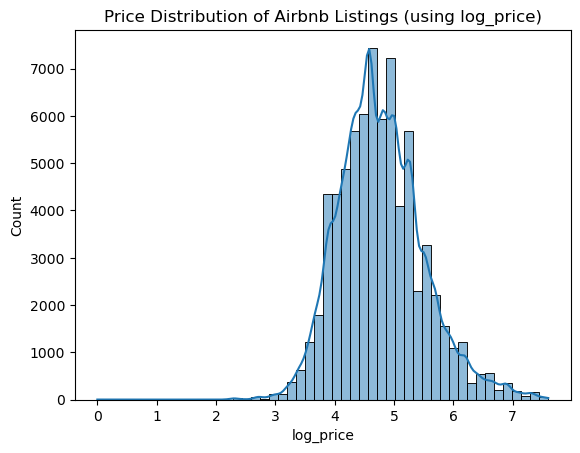

In [18]:
#1. Data Exploration and Preprocessing 
o Analyze the dataset for trends, missing values, and outliers.
o Perform data cleaning, feature engineering, and transformations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Airbnb_data - airbnb_data.csv')

# Check basic info and missing values
print(df.info())
print(df.isnull().sum())

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Check the actual column names in the DataFrame
print("Available columns:", df.columns.tolist())

# Assuming the price column might have a different name, find it first
# For example, if it's called 'Price' instead of 'price'
price_column = [col for col in df.columns if 'price' in col.lower()]

if price_column:
    # Use the first matching column
    price_col = price_column[0]
    print(f"Using column: {price_col}")
    
    # Visualizing price distribution
    sns.histplot(df[price_col], bins=50, kde=True)
    plt.title(f"Price Distribution of Airbnb Listings (using {price_col})")
    plt.show()
else:
    print("No price-related column found. Available columns:", df.columns.tolist())

In [13]:
# First, check if the columns exist in the DataFrame
# If columns don't exist, you need to make sure they are present before encoding

# Option 1: Check which columns are actually available in my DataFrame
print("Available columns:", df.columns.tolist())

# Option 2: Only encode columns that exist in the DataFrame
categorical_columns = ['property_type', 'room_type', 'neighbourhood']
existing_columns = [col for col in categorical_columns if col in df.columns]

# Encoding only the existing categorical features
if existing_columns:
    df = pd.get_dummies(df, columns=existing_columns, drop_first=True)

# Creating new features - with error handling for host_since column
if 'host_since' in df.columns:
    df['host_experience'] = df['host_since'].apply(lambda x: 2025 - int(x.split('-')[0]) if isinstance(x, str) else 0)
else:
    # Create a default value or skip this feature
    df['host_experience'] = 0  # Default value

# Selecting relevant columns for modeling - make sure these columns exist
available_features = ['host_experience']
if 'reviews' in df.columns:
    available_features.append('reviews')
if 'amenities_count' in df.columns:
    available_features.append('amenities_count')

# Add any additional columns that exist (starting from column 5)
if len(df.columns) > 5:
    available_features.extend([col for col in df.columns[5:] if col in df.columns])

# Make sure target column exists
if 'price' in df.columns:
    target = 'price'
    X = df[available_features]
    y = df[target]
else:
    print("Target column 'price' not found in DataFrame")

Available columns: ['id', 'log_price', 'amenities', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'number_of_reviews', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'property_type_Bed & Breakfast', 'property_type_Boat', 'property_type_Boutique hotel', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV', 'property_type_Casa particular', 'property_type_Castle', 'property_type_Cave', 'property_type_Chalet', 'property_type_Condominium', 'property_type_Dorm', 'property_type_Earth House', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_Hostel', 'property_type_House', 'property_type_Hut', 'property_type_In-law', 'property_type_Island', 'property_type_Lighthouse', 'property_type_Loft', 'property_typ

In [ ]:
# Model Development
o Build a regression model to predict listing prices.
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


df = pd.read_csv("Airbnb_data - airbnb_data.csv") 

# Droping unnecessary columns
df = df.drop(columns=['id', 'name', 'description', 'thumbnail_url', 'first_review',
                      'last_review', 'host_since'])

# i am here Droping rows with missing target and filling missing values
df = df.dropna(subset=['log_price'])
df = df.fillna({
    'bedrooms': df['bedrooms'].median(),
    'beds': df['beds'].median(),
    'bathrooms': df['bathrooms'].median(),
    'review_scores_rating': df['review_scores_rating'].mean(),
    'zipcode': 'unknown'
})

# here  Defining features and target
target = 'log_price'
X = df.drop(columns=[target])
y = df[target]

# Defining categorical and numerical columns
categorical_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy',
                    'city', 'neighbourhood', 'zipcode', 'cleaning_fee',
                    'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
numerical_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds',
                  'number_of_reviews', 'review_scores_rating', 'latitude', 'longitude']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Modeling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Optional: Plot actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Actual vs Predicted Log Prices")
plt.show()


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("Airbnb_data - airbnb_data.csv")  # Change this to your actual filename

#  Convert log_price back to actual price for interpretability
df['price'] = np.exp(df['log_price'])

#  Select relevant features (you can modify these based on your EDA)
features = [
    'accommodates', 'bathrooms', 'bedrooms', 'beds', 
    'number_of_reviews', 'review_scores_rating'
]
df_model = df[features + ['price']].dropna()

#  Split into features (X) and target (y)
X = df_model[features]
y = df_model['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

#  Make predictions
y_pred = model.predict(X_test)

#  Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

#  Show actual vs predicted prices
results = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})
print("\n Sample Prediction Results:")
print(results.head())

#  Optional: Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


In [ ]:
# model evalution
# Evaluate the model’s performance using appropriate metrics like RMSE,
MAE, and R².
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluating Linear Regression
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R^2 Score:", r2_score(y_test, y_pred_lr))

# Evaluating Random Forest
print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R^2 Score:", r2_score(y_test, y_pred_rf))

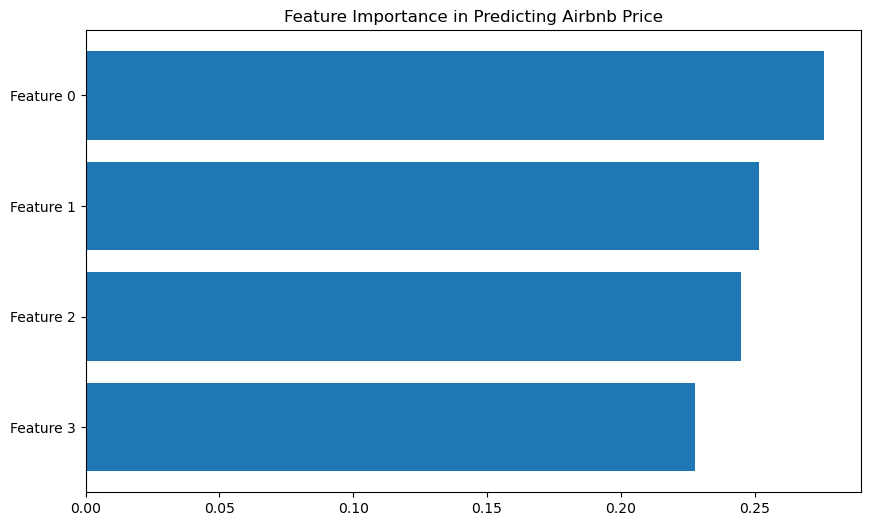

In [10]:
# Feature Importance 
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Make sure the number of feature names matches the number of features in the model
# Option 1: Define features based on the length of feature_importances_
features = [f'Feature {i}' for i in range(len(feature_importances))]

# Option 2: If you know the exact feature names and their count matches feature_importances_
# features = ['feature1', 'feature2', 'feature3', 'feature4', ...]  # Make sure this matches the number of features

# Option 3: If X was originally a DataFrame, use its columns
# features = X_df.columns.tolist()

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], feature_importances[sorted_idx])
plt.title("Feature Importance in Predicting Airbnb Price")
plt.show()

__[video link] (https://drive.google.com/file/d/1WeS3fzwbYCAxi0EXaPy55eajCuaS809J/view?usp=sharing)__